In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

In [15]:
def getdata(fname):
    f = h5py.File(fname,'r')
    pos_data = np.array(f['pos_data'])
    xyz = pos_data.reshape(-1,11).T[2:5]
    return xyz

## Functions

In [7]:
pressures = np.array([5.6, 3.7, 3, 2.1, 1.7, 1.4, 1.2, 1.1])
files = [r'/data/new_trap/20190607/50000samples_{}mbar_FeedbackOff_8dbm.h5'.format(i) for i in pressures]

In [8]:
bdfs = [BeadDataFile.BeadDataFile(file) for file in files]

No cantilever data


ValueError: cannot reshape array of size 650000 into shape (12)

In [44]:
fluc_x = np.array([np.std(bdf.xyz[0]) for bdf in bdfs])
fluc_y = np.array([np.std(bdf.xyz[1]) for bdf in bdfs])
fluc_z = np.array([np.std(bdf.xyz[2]) for bdf in bdfs])

In [38]:
pressures.shape, fluc.shape

((8,), (8,))

<IPython.core.display.Javascript object>


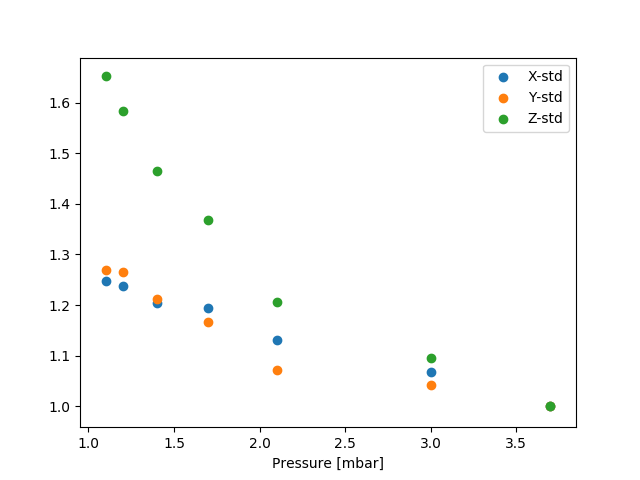

In [46]:
_,ax = plt.subplots()
ax.scatter(pressures[1:],fluc_x[1:]/fluc_x[1], label='X-std')
ax.scatter(pressures[1:],fluc_y[1:]/fluc_y[1], label='Y-std')
ax.scatter(pressures[1:],fluc_z[1:]/fluc_z[1], label='Z-std')
ax.set(xlabel='Pressure [mbar]')
ax.legend()

In [16]:
p11 = ['1', '9e-1', '8e-1', '7e-1', '6e-1', '5e-1']
pp11 = np.array([1, 0.9, 0.8, 0.7, 0.6, 0.5])
files11 = [r'/data/new_trap/20190607/50000samples_{}mbar_FeedbackOff_11dbm.h5'.format(i) for i in p11]
bdfs11 = [getdata(file) for file in files11]

In [17]:
bdfs11[0].shape

(3, 50000)

In [60]:
fluc11_x = np.array([np.std(bdf.xyz[0]) for bdf in bdfs11])
fluc11_y = np.array([np.std(bdf.xyz[1]) for bdf in bdfs11])
fluc11_z = np.array([np.std(bdf.xyz[2]) for bdf in bdfs11])

<IPython.core.display.Javascript object>


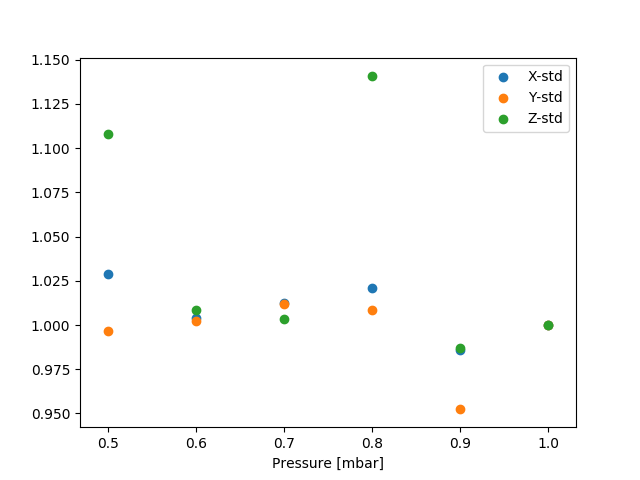

In [63]:
_,ax = plt.subplots()
ax.scatter(pp11,fluc11_x/fluc11_x[0], label='X-std')
ax.scatter(pp11,fluc11_y/fluc11_y[0], label='Y-std')
ax.scatter(pp11,fluc11_z/fluc11_z[0], label='Z-std')
ax.set(xlabel='Pressure [mbar]')
ax.legend()

In [72]:
fluc11_x[0]/2**32, fluc_x[7]/2**32

(0.0019303979448966843, 0.0020243969779091334)

In [75]:
fluc11_y[0]/2**32, fluc_y[7]/2**32

(0.002071101776338406, 0.0031648101081073205)

## Pressure data 20190616

In [5]:
pressures = np.array([5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1])
p_str = ['5.5', '5', '4.5', '4', '3.5', '3', '2.5', '2', '1.5', '1']
files = [r'/data/new_trap/20190616/50000samples_{}mbar_FeedbackOff_8dbm.h5'.format(str(i)) for i in p_str]

In [6]:
bdfs = [BeadDataFile.BeadDataFile(file) for file in files]
fluc_x = np.array([np.std(bdf.xyz[0]) for bdf in bdfs])
fluc_y = np.array([np.std(bdf.xyz[1]) for bdf in bdfs])
fluc_z = np.array([np.std(bdf.xyz[2]) for bdf in bdfs])

<IPython.core.display.Javascript object>


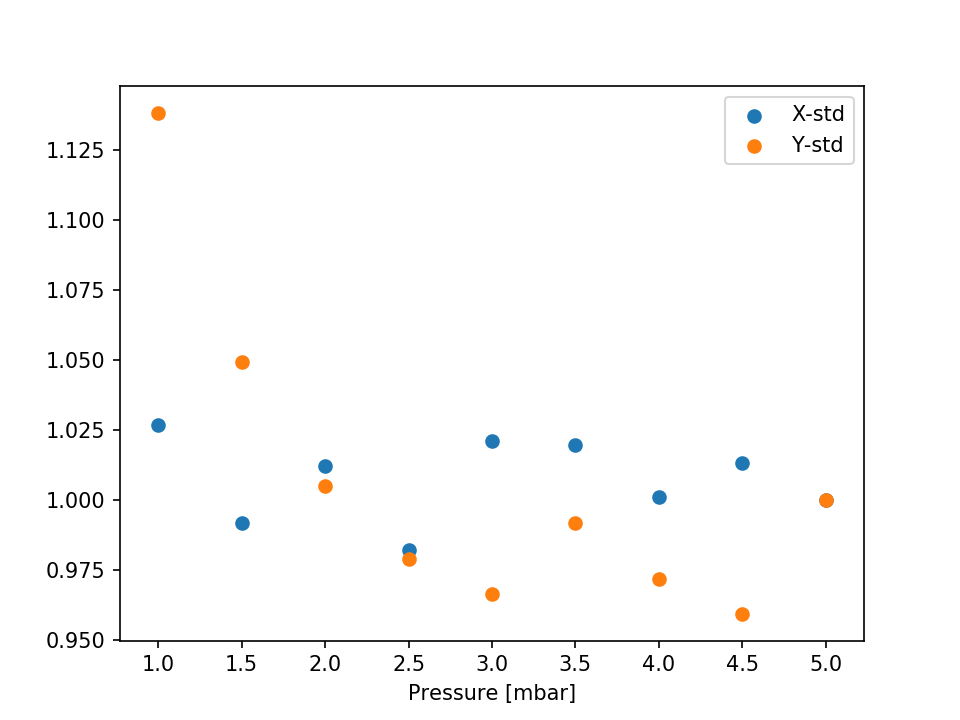

In [7]:
_,ax = plt.subplots()
ax.scatter(pressures[1:],fluc_x[1:]/fluc_x[1], label='X-std')
ax.scatter(pressures[1:],fluc_y[1:]/fluc_y[1], label='Y-std')
# ax.scatter(pressures[1:],fluc_z[1:]/fluc_z[1], label='Z-std')
ax.set(xlabel='Pressure [mbar]')
ax.legend()

## Phase information

In [34]:
BDF = bdfs[5]
pos_phase = (BDF.phase[0]+BDF.phase[2])-(BDF.phase[1]+BDF.phase[3])

<IPython.core.display.Javascript object>


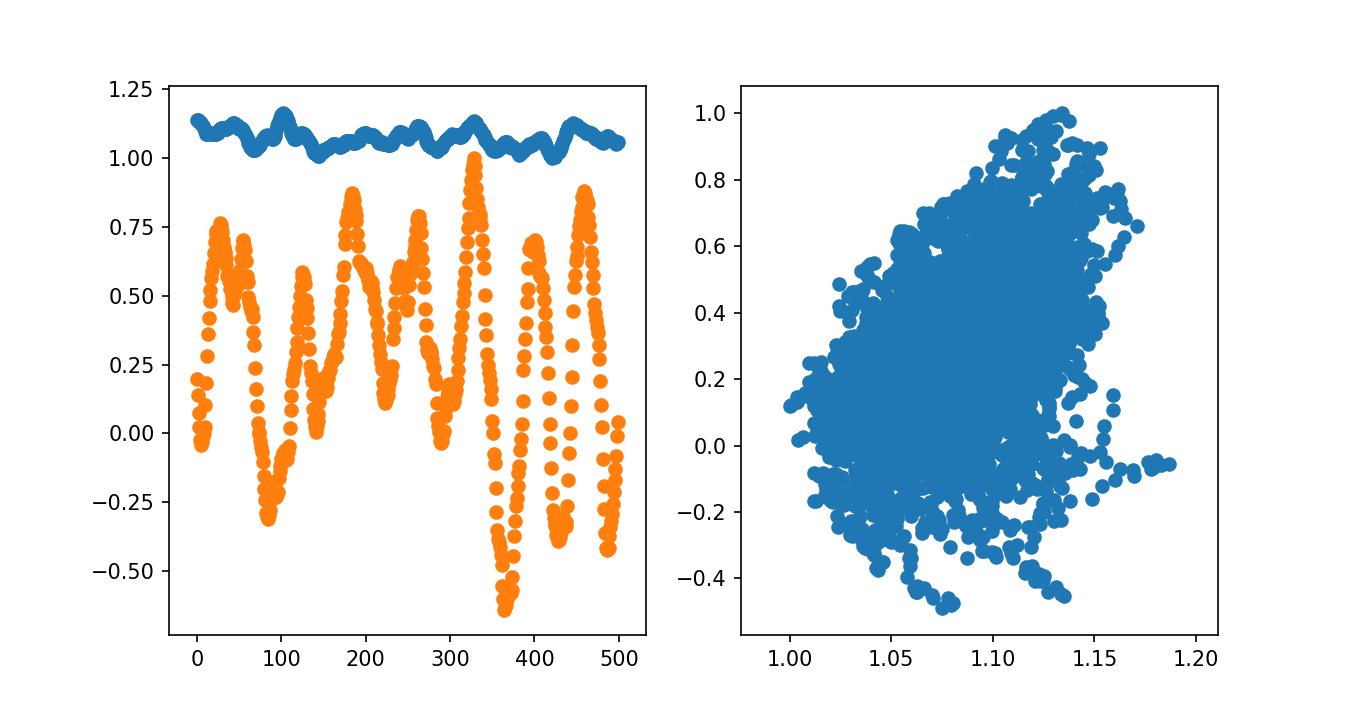

In [35]:
_,ax = plt.subplots(1,2)
ax[0].scatter(range(500),pos_phase[:500]/np.max(pos_phase[:500]))
ax[0].scatter(range(500),BDF.y2[:500]/np.max(BDF.y2[:500]))
ax[1].scatter(pos_phase[:5000]/np.max(pos_phase[:5000]), BDF.y2[:5000]/np.max(BDF.y2[:5000]))

In [40]:
ypos_95 = BDF.response_at_freq2('y',50)[1000:3000]
yphase_95 = BDF.response_at_freq3('y',50)[1000:3000]

<IPython.core.display.Javascript object>


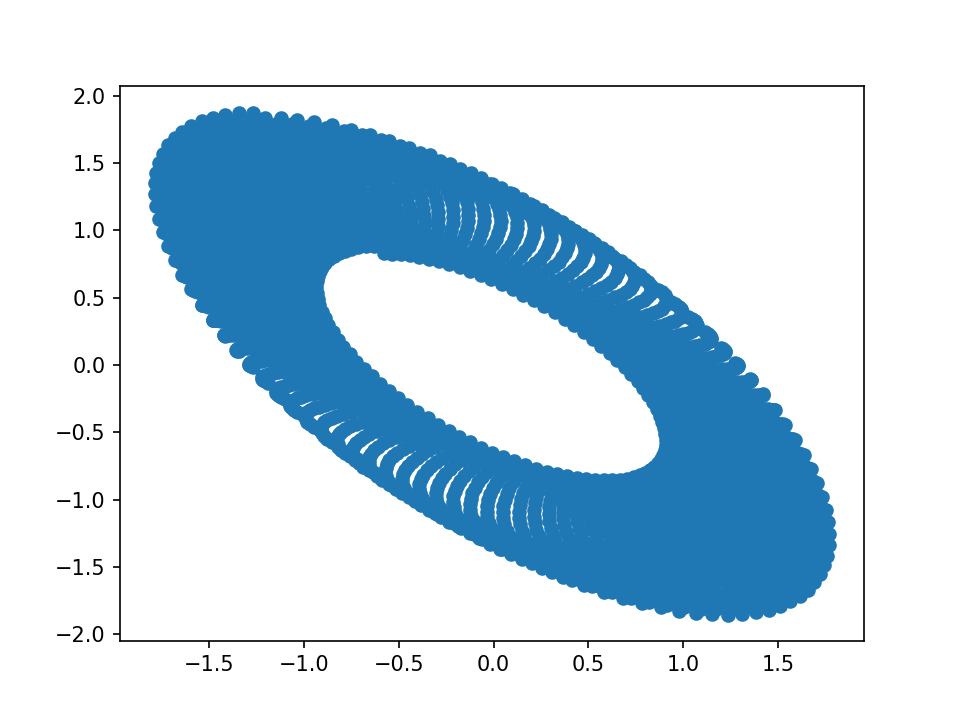

In [41]:
_,ax = plt.subplots()
ax.scatter(yphase_95/np.std(yphase_95), ypos_95/np.std(ypos_95))